# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm
import statsmodels

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
nulos = (sensor.isnull().sum()).sort_values(ascending=False)
nulos

userAcceleration.z    0
userAcceleration.y    0
userAcceleration.x    0
rotationRate.z        0
rotationRate.y        0
rotationRate.x        0
gravity.z             0
gravity.y             0
gravity.x             0
attitude.yaw          0
attitude.pitch        0
attitude.roll         0
dtype: int64

How many rows and columns are in our data?

In [7]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [9]:
date_index = pd.date_range(start='01/01/2018 00:00:00', end='01/01/2018 00:29:10', periods = sensor.shape[0])
print(date_index)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)


Assign the time series index to the dataframe's index.

In [10]:
sensor.index = pd.DatetimeIndex(date_index, freq='infer')
print(sensor.index)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<ipython-input-11-817fa2f06d14>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  tsdAcc = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"], freq= 60)


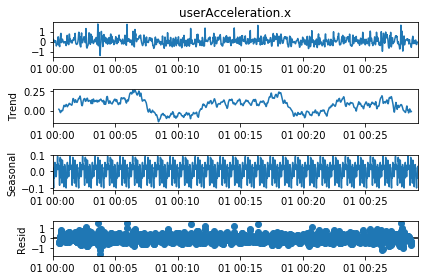

In [11]:
tsdAcc = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"], freq= 60)
tsdAcc.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<ipython-input-12-6f59b05645ef>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  tsd_rot = sm.tsa.seasonal_decompose(sensor["rotationRate.x"], freq= 60)


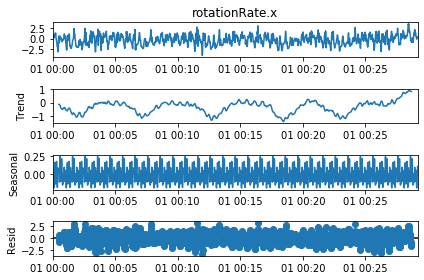

In [12]:
tsd_rot = sm.tsa.seasonal_decompose(sensor["rotationRate.x"], freq= 60)
tsd_rot.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

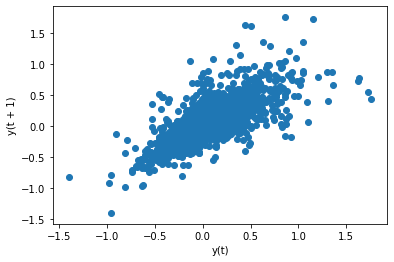

In [13]:
# Your code here:
pd.plotting.lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

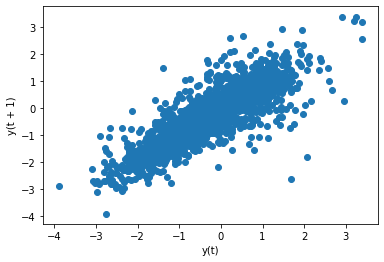

In [14]:
# Your code here:
pd.plotting.lag_plot(sensor['rotationRate.x'])

What are your conclusions from both visualizations?

*Los datos están más o menos agrupados en torno a la diagonal, lo que quiere decir que hay autocorrelación. Además, al ser esta tendencia positiva, la autocorrelación también lo es.*

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [30]:
from statsmodels.tsa.stattools import adfuller

# Test para userAccelaration.x
X1 = sensor['userAcceleration.x'].values
result1 = adfuller(X1)
print('userAcceleration.x')
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))
    
# Para rotationRate.x
X2 = sensor["rotationRate.x"].values
result2 = adfuller(X2)
print('rotationRate.x')
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

# FUENTE: https://machinelearningmastery.com/time-series-data-stationary-python/

userAcceleration.x
ADF Statistic: -17.957994
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
rotationRate.x
ADF Statistic: -5.269861
p-value: 0.000006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


What are your conclusions from this test?

*En ambos tests el p-value es <0.05, por tanto, se rechaza la hipótesis nula y se concluye que los datos no tienen raíz unitaria y son estacionarios**

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [40]:
from statsmodels.tsa.arima_model import ARMA

# Creación de los datos de entrenamiento y validación:
# Train data
train = sensor["userAcceleration.x"][:-10]

# Test data
test= sensor["userAcceleration.x"][len(sensor["userAcceleration.x"])-10:]
# Comprobar
print(train.shape, test.shape)

(1741,) (10,)


In [44]:
# Crear el modelo
modelo_acce = ARMA(train, order=(2,1))
# Ajustarlo
arma_results = modelo_acce.fit()
# Ejecutarlo sobre nuestra muestra de validación
acc_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [59]:
import statsmodels.tools.eval_measures
# Comparar los valores predichos con los verdaderos
rmse_acc = statsmodels.tools.eval_measures.rmse(test, acc_pred)
print('RMSE:',round(rmse_acc,3))

RMSE: 0.225


In [56]:
# Para verlo mejor
pd.DataFrame([test, acc_pred], index=["Observado", "Predicho"]).T

Observado  Predicho
2018-01-01 00:29:01   0.149749  0.173149
2018-01-01 00:29:02   0.038461  0.142896
2018-01-01 00:29:03  -0.169175  0.100522
2018-01-01 00:29:04  -0.300361  0.070106
2018-01-01 00:29:05  -0.270174  0.056099
2018-01-01 00:29:06  -0.268367  0.053778
2018-01-01 00:29:07  -0.102444  0.056790
2018-01-01 00:29:08  -0.085590  0.060646
2018-01-01 00:29:09  -0.048105  0.063316
2018-01-01 00:29:10  -0.065011  0.064493